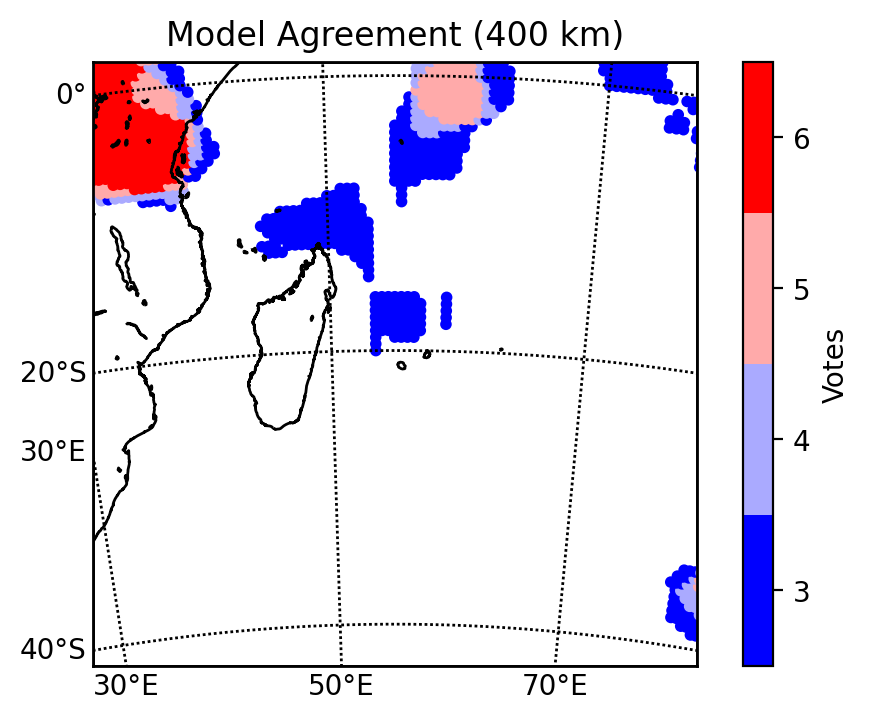

In [62]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl

# create figure in high resolution
plt.figure(dpi=200)

# read in model agreement data filtered for >=3 votes
df = pd.read_csv('400_vote_filtered.csv')
lats = df['Lat'].to_numpy()[:]
lons = df['Lon'].to_numpy()[:]
vote = df['Vote'].to_numpy()[:]

# define 5000x5000km map area with basemap, hawaii lat 21 lon -157, reunion lat -21 lon 55
m = Basemap(width=5000000, height=5000000, projection='lcc',
            resolution='i', lat_0=-21., lon_0=55.)

# simplified dataframe variables to x,y,z for ease
x, y = m(lons, lats)
z = vote

# show coastlines, parallels and meridians on map at 20 degree intervals
m.drawmapboundary(fill_color='#ffffff')
m.drawcoastlines(linewidth=1)
parallels = np.arange(-40.,80,20.)
m.drawparallels(parallels, labels=[1,0,0,1])
meridians = np.arange(10.,360.,20.)
m.drawmeridians(meridians, labels=[1,0,0,1])

# map colour, create scatter plot and discrete colourbar with 3-6 range
cmap = plt.get_cmap('bwr')
bounds = np.linspace(2.5,6.5,5)
norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
plt.scatter(x,y,s=10, c=z, cmap=cmap, norm=norm)
cbar = plt.colorbar(label="Votes", orientation="vertical", ticks=(3,4,5,6))

plt.title('Model Agreement (400 km)')
plt.show()